In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
#  Import and read .csv.

theft_df = pd.read_csv("Resources/BinaryClassifier.csv")
theft_df.head()

,Unnamed: 0,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,offense_code,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,0,Angelina,County,Texas,West South Central,ANGELINA,South,8B,26B,Unknown,Unknown,0.0,U,I,25,95,20,375.0,False
1,1,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
2,2,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,65,0.0,False
3,3,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,13,320.0,False
4,4,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23F,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False


In [3]:
#drop extra index
theft_df = theft_df.drop(labels ="Unnamed: 0",axis =1)
theft_df.head()

,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,offense_code,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,Angelina,County,Texas,West South Central,ANGELINA,South,8B,26B,Unknown,Unknown,0.0,U,I,25,95,20,375.0,False
1,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
2,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,65,0.0,False
3,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,13,320.0,False
4,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23F,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False


In [4]:
# Determine the number of unique values in each column using .nunique()

theft_df.nunique()

pub_agency_name          2927
agency_type_name            8
state_name                 50
division_name              10
county_name              1227
region_name                 5
population_group_code      20
offense_code               19
offender_race               6
offender_ethnicity          4
offender_age               87
offender_sex                3
victim_type_code            9
location_code              47
weapon_code                19
prop_desc_code             68
stolen_value             5241
recovered_flag              2
dtype: int64

In [5]:
# Look at recovered_flag value counts for binning

stolen_value_count=theft_df.stolen_value.value_counts()
stolen_value_count.head

<bound method NDFrame.head of 1.0        13674
0.0        10360
100.0       4166
200.0       3723
300.0       3340
           ...  
47402.0        1
20720.0        1
3951.0         1
12252.0        1
2982.0         1
Name: stolen_value, Length: 5241, dtype: int64>

<AxesSubplot:ylabel='Density'>

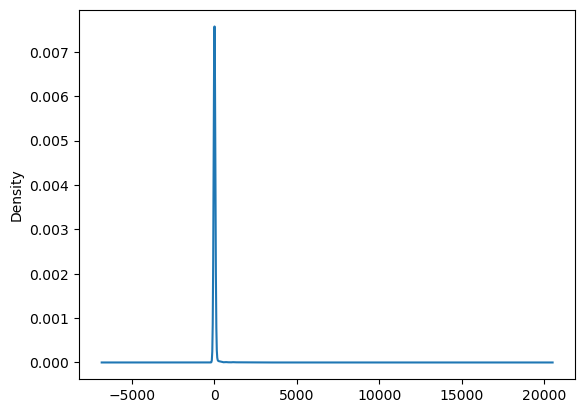

In [6]:
# Visualize the value counts of stolen_value
stolen_value_count.plot.density()

In [7]:
# Sorting outliers
theft_df_2 = theft_df[theft_df["stolen_value"] < 150000]
theft_df_2.head()

,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,offense_code,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,Angelina,County,Texas,West South Central,ANGELINA,South,8B,26B,Unknown,Unknown,0.0,U,I,25,95,20,375.0,False
1,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
2,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,65,0.0,False
3,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,13,320.0,False
4,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23F,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False


In [8]:
# Dropping redundant columns

to_drop = ["pub_agency_name",
           "division_name", 
           "county_name", 
           "population_group_code", 
           "offender_race", 
           "offender_ethnicity",
           "offender_age",
           "victim_type_code"]
theft_df_2 = theft_df.drop(labels = to_drop, axis = 1)
theft_df_2.head()

,agency_type_name,state_name,region_name,offense_code,offender_sex,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,County,Texas,South,26B,U,25,95,20,375.0,False
1,County,Alabama,South,23H,U,20,95,77,1.0,False
2,County,Alabama,South,23H,U,20,95,65,0.0,False
3,County,Alabama,South,23H,U,20,95,13,320.0,False
4,County,Alabama,South,23F,U,20,95,77,1.0,False


In [9]:
#ready to encode
enc = OneHotEncoder(sparse=False)

In [10]:
#make our target column binary for the encoder

theft_df_2.recovered_flag = theft_df_2.recovered_flag.replace({True:1,False:0})
#check to see if worked
theft_df_2.dtypes

agency_type_name     object
state_name           object
region_name          object
offense_code         object
offender_sex         object
location_code         int64
weapon_code          object
prop_desc_code        int64
stolen_value        float64
recovered_flag        int64
dtype: object

In [11]:
# Convert everything to binary
object_columns = theft_df_2.dtypes[theft_df_2.dtypes == "object"].index.tolist()
print(object_columns)

['agency_type_name', 'state_name', 'region_name', 'offense_code', 'offender_sex', 'weapon_code']


In [12]:
# Deploy the OHE produced earlier to make the conversions
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(theft_df_2[object_columns]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(object_columns)
encode_df.head()

,agency_type_name_City,agency_type_name_County,agency_type_name_Federal,agency_type_name_Other,agency_type_name_Other State Agency,agency_type_name_State Police,agency_type_name_Tribal,agency_type_name_University or College,state_name_Alabama,state_name_Alaska,...,weapon_code_20,weapon_code_30,weapon_code_35,weapon_code_40,weapon_code_50,weapon_code_70,weapon_code_85,weapon_code_90,weapon_code_95,weapon_code_99
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
#take the encoded dataframe and add it back into the original, then drop the changed columns
theft_df_2 = theft_df_2.merge(encode_df, left_index=True, right_index = True)
theft_df_2= theft_df_2.drop(labels =object_columns,axis=1)
theft_df_2.head()

,location_code,prop_desc_code,stolen_value,recovered_flag,agency_type_name_City,agency_type_name_County,agency_type_name_Federal,agency_type_name_Other,agency_type_name_Other State Agency,agency_type_name_State Police,...,weapon_code_20,weapon_code_30,weapon_code_35,weapon_code_40,weapon_code_50,weapon_code_70,weapon_code_85,weapon_code_90,weapon_code_95,weapon_code_99
0,25,20,375.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,77,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20,65,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20,13,320.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20,77,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
#with an additional set of bucketing done, it's time to go ahead and try some models

# Split data for test and train
y = theft_df_2["recovered_flag"].values
X = theft_df_2.drop(labels ="recovered_flag",axis =1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=78)

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
#time to define the first new model with the shape of the previous most succesful model

number_input_features = len(X_train[0])


nn10 = tf.keras.models.Sequential()

# First hidden layer
nn10.add(tf.keras.layers.Dense(units=110, activation="relu", input_dim = number_input_features))
       
# Second hidden layer
nn10.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Output layer
nn10.add(tf.keras.layers.Dense(units=40, activation="sigmoid"))

# Fourth hidden layer
nn10.add(tf.keras.layers.Dense(units=20, activation="sigmoid"))

# Output layer
nn10.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 110)               11880     
                                                                 
 dense_1 (Dense)             (None, 80)                8880      
                                                                 
 dense_2 (Dense)             (None, 40)                3240      
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn10.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
#Train the Model
fit_model = nn10.fit(X_train_scaled,y_train,epochs=324)

Epoch 1/324
2882/2882 [==============================] - 4s 1ms/step - loss: 0.3859 - accuracy: 0.8482
Epoch 2/324
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3441 - accuracy: 0.8619
Epoch 3/324
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3943 - accuracy: 0.8167
Epoch 4/324
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3273 - accuracy: 0.8656
Epoch 5/324
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3237 - accuracy: 0.8680
Epoch 6/324
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3209 - accuracy: 0.8687
Epoch 7/324
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3208 - accuracy: 0.8707
Epoch 8/324
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3233 - accuracy: 0.8717
Epoch 9/324
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3271 - accuracy: 0.8708
Epoch 10/324
2882/2882 [==============================] - 3s 1ms/step - l

In [19]:
model_loss, model_accuracy = nn10.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

961/961 - 1s - loss: 0.3171 - accuracy: 0.8755 - 747ms/epoch - 777us/step
Loss: 0.3171258866786957, Accuracy: 0.8755326867103577
